**BLOOD CELL DETECTION USING YOLO**

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
#!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 12575, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 12575 (delta 76), reused 95 (delta 54), pack-reused 12448
Receiving objects: 100% (12575/12575), 12.26 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (8668/8668), done.
/content/yolov5


In [2]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch
from IPython.display import Image, clear_output  # to display images
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 7.8 MB/s 
     |████████████████████████████████| 750.6 MB 12 kB/s 
     |████████████████████████████████| 21.0 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.11.0 which is incompatible.
Setup complete. Using torch 1.11.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [3]:
#Store Location in google Colab
%cd /content/yolov5

/content/yolov5


In [4]:
#The Dataset Info on which the yoloV5 model in pre trained on
!cat /content/yolov5/data/coco128.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/coco128  # dataset root dir
train: images/train2017  # train images (relative to 'path') 128 images
val: images/train2017  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
nc: 80  # number of classes
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'fris

In [5]:
#The model architecture of yoloV5 used
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [6]:
#Hyperparameters
WIDTH = 256
HEIGHT = 256
cells_id = {
    'rbc': 0,
    'wbc': 1
}

In [7]:
#Labels
cells_classes = list(cells_id.keys())
cells_classes

['rbc', 'wbc']

In [63]:
'''To train a YOLO-V5 model, we need to have two YAML files.

The first YAML to specify:
[where our training and validation data is, the number of classes that we want to detect, the names corresponding to those classes] --> blood_cell.yaml that we will edit

The second YAML is to specify the whole model configuration --> This we do not need since we will be using the default version
'''
pass

In [8]:
#Yaml file used for our training purpose
yaml_file="/content/yolov5/data/blood_cell.yaml"

In [9]:
#train and test directory containing images+labels
train_dir = "/content/drive/MyDrive/prepared_data/train"
test_dir = "/content/drive/MyDrive/prepared_data/test"

In [11]:
#train and test directory containing images
train_images_dir = "/content/drive/MyDrive/prepared_data/train/images"
val_images_dir = "/content/drive/MyDrive/prepared_data/test/images"

In [12]:
print(train_images_dir)

/content/drive/MyDrive/prepared_data/train/images


In [13]:
#Editing the yaml file according to our requirements
names_str=""
for item in cells_classes:
    names_str=names_str + ", \'%s\'"%item
names_str= "names: ["+names_str[1:]+"]"

with open(yaml_file, "w") as wobj:
    wobj.write("train: %s\n"%train_images_dir)
    wobj.write("val: %s\n"%val_images_dir)
    wobj.write("nc: %d\n"%len(cells_classes))
    wobj.write(names_str+"\n")

In [16]:
#Begin Training
!python train.py --data data/blood_cell.yaml --batch-size 4 --epochs 300 --img-size 640 --project runs/train --name blood_cell --weights weights/yolov5s.pt --device 0

train: weights=weights/yolov5s.pt, cfg=, data=data/blood_cell.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=blood_cell, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

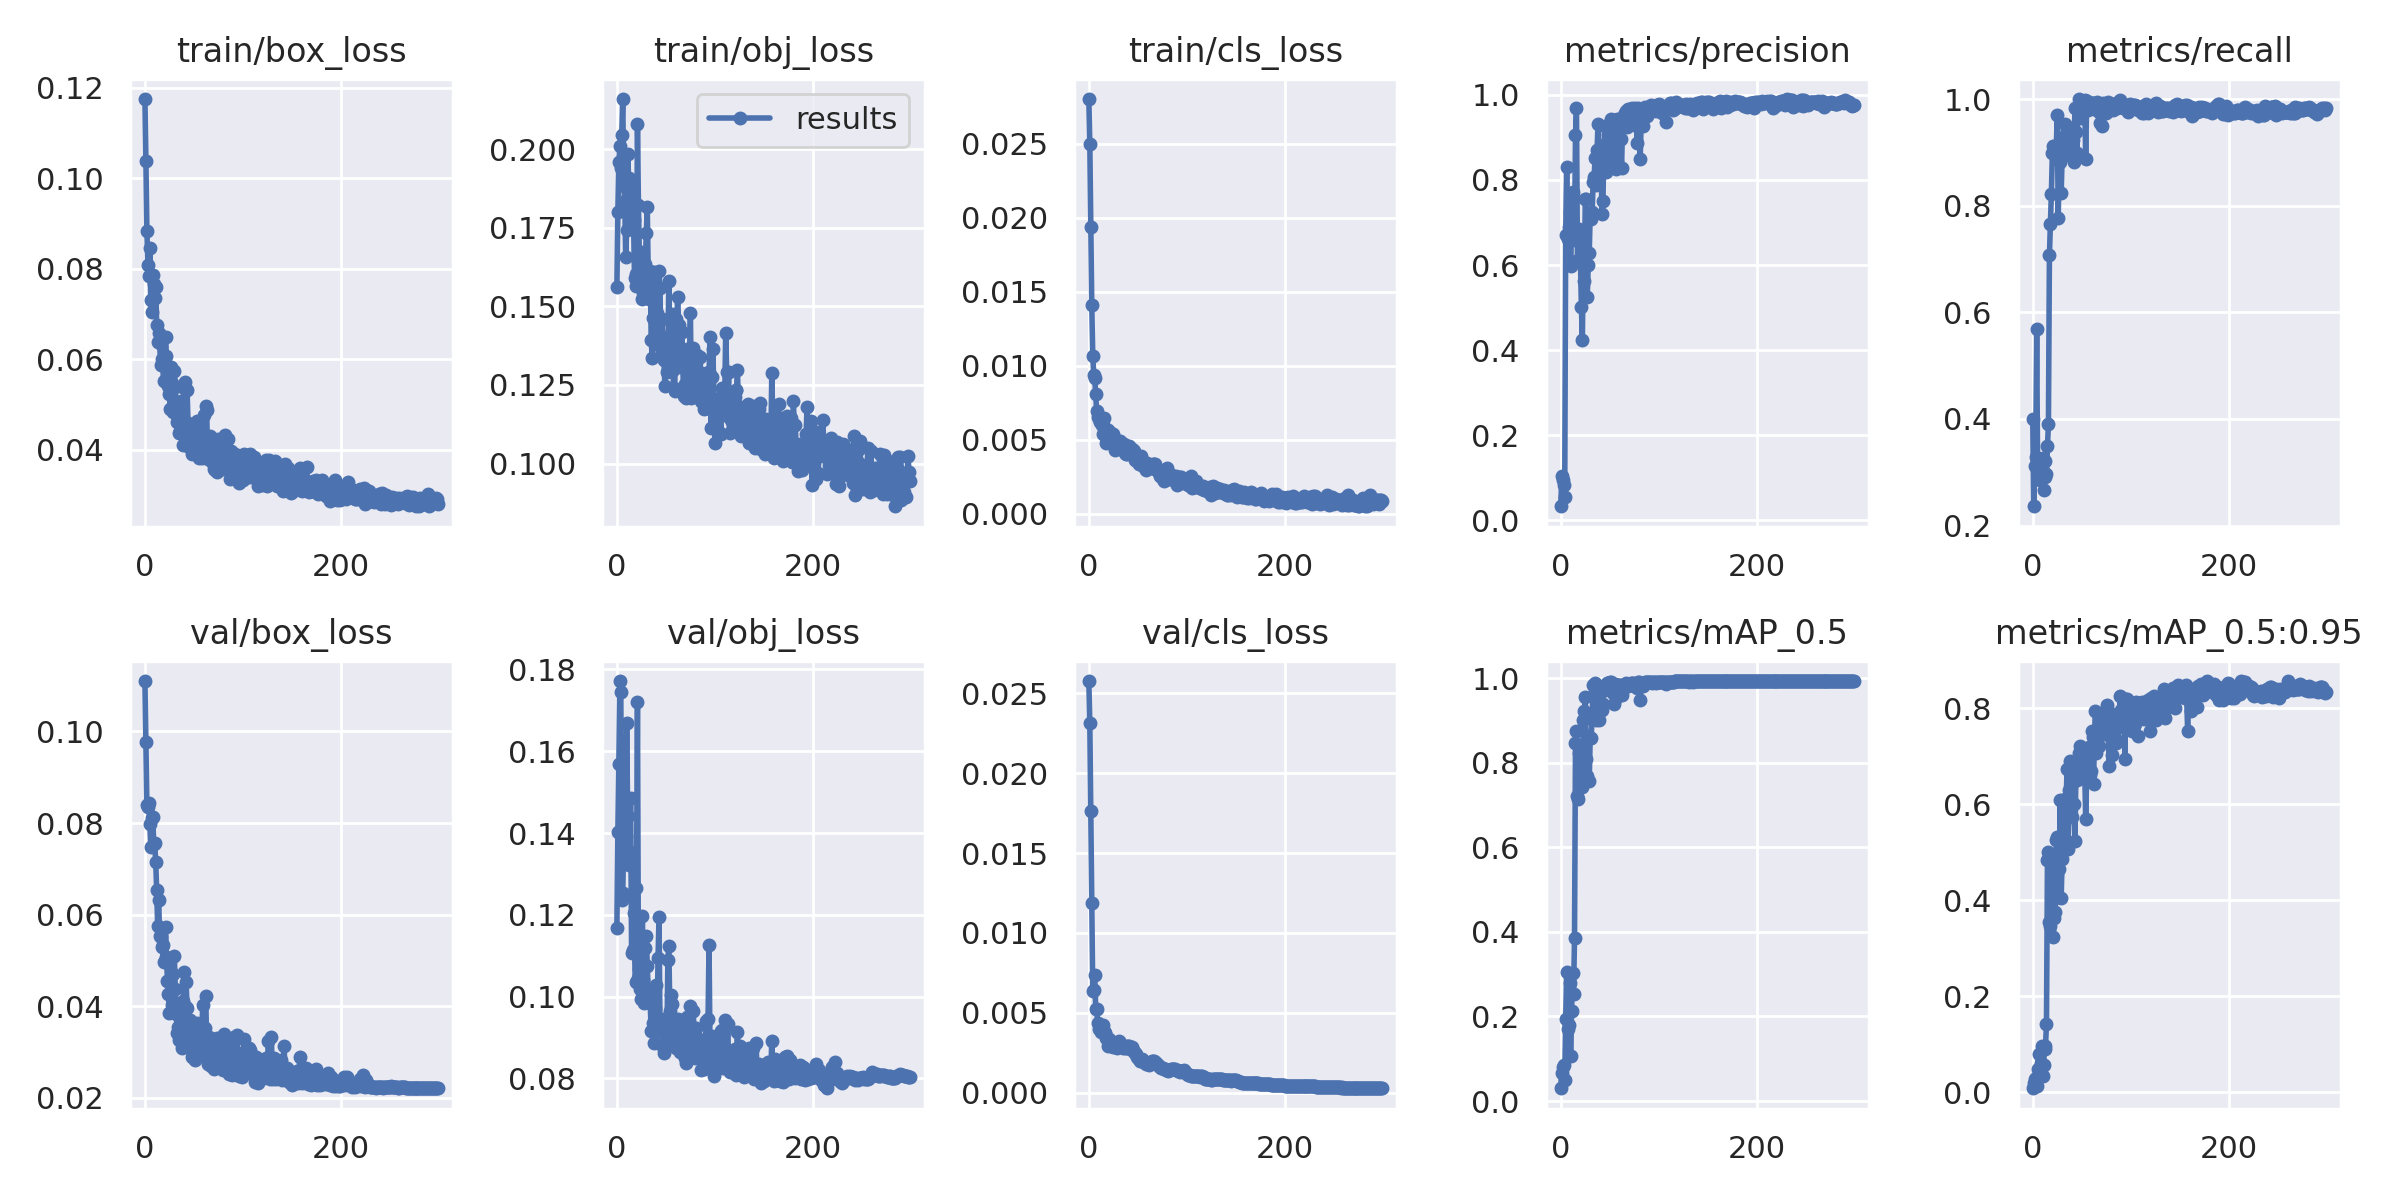

In [30]:
#View Training Results
Image(filename='/content/yolov5/runs/train/blood_cell/results.png', width=1000)

 TRAINING DATA WITH GROUND TRUTH LABELS: 


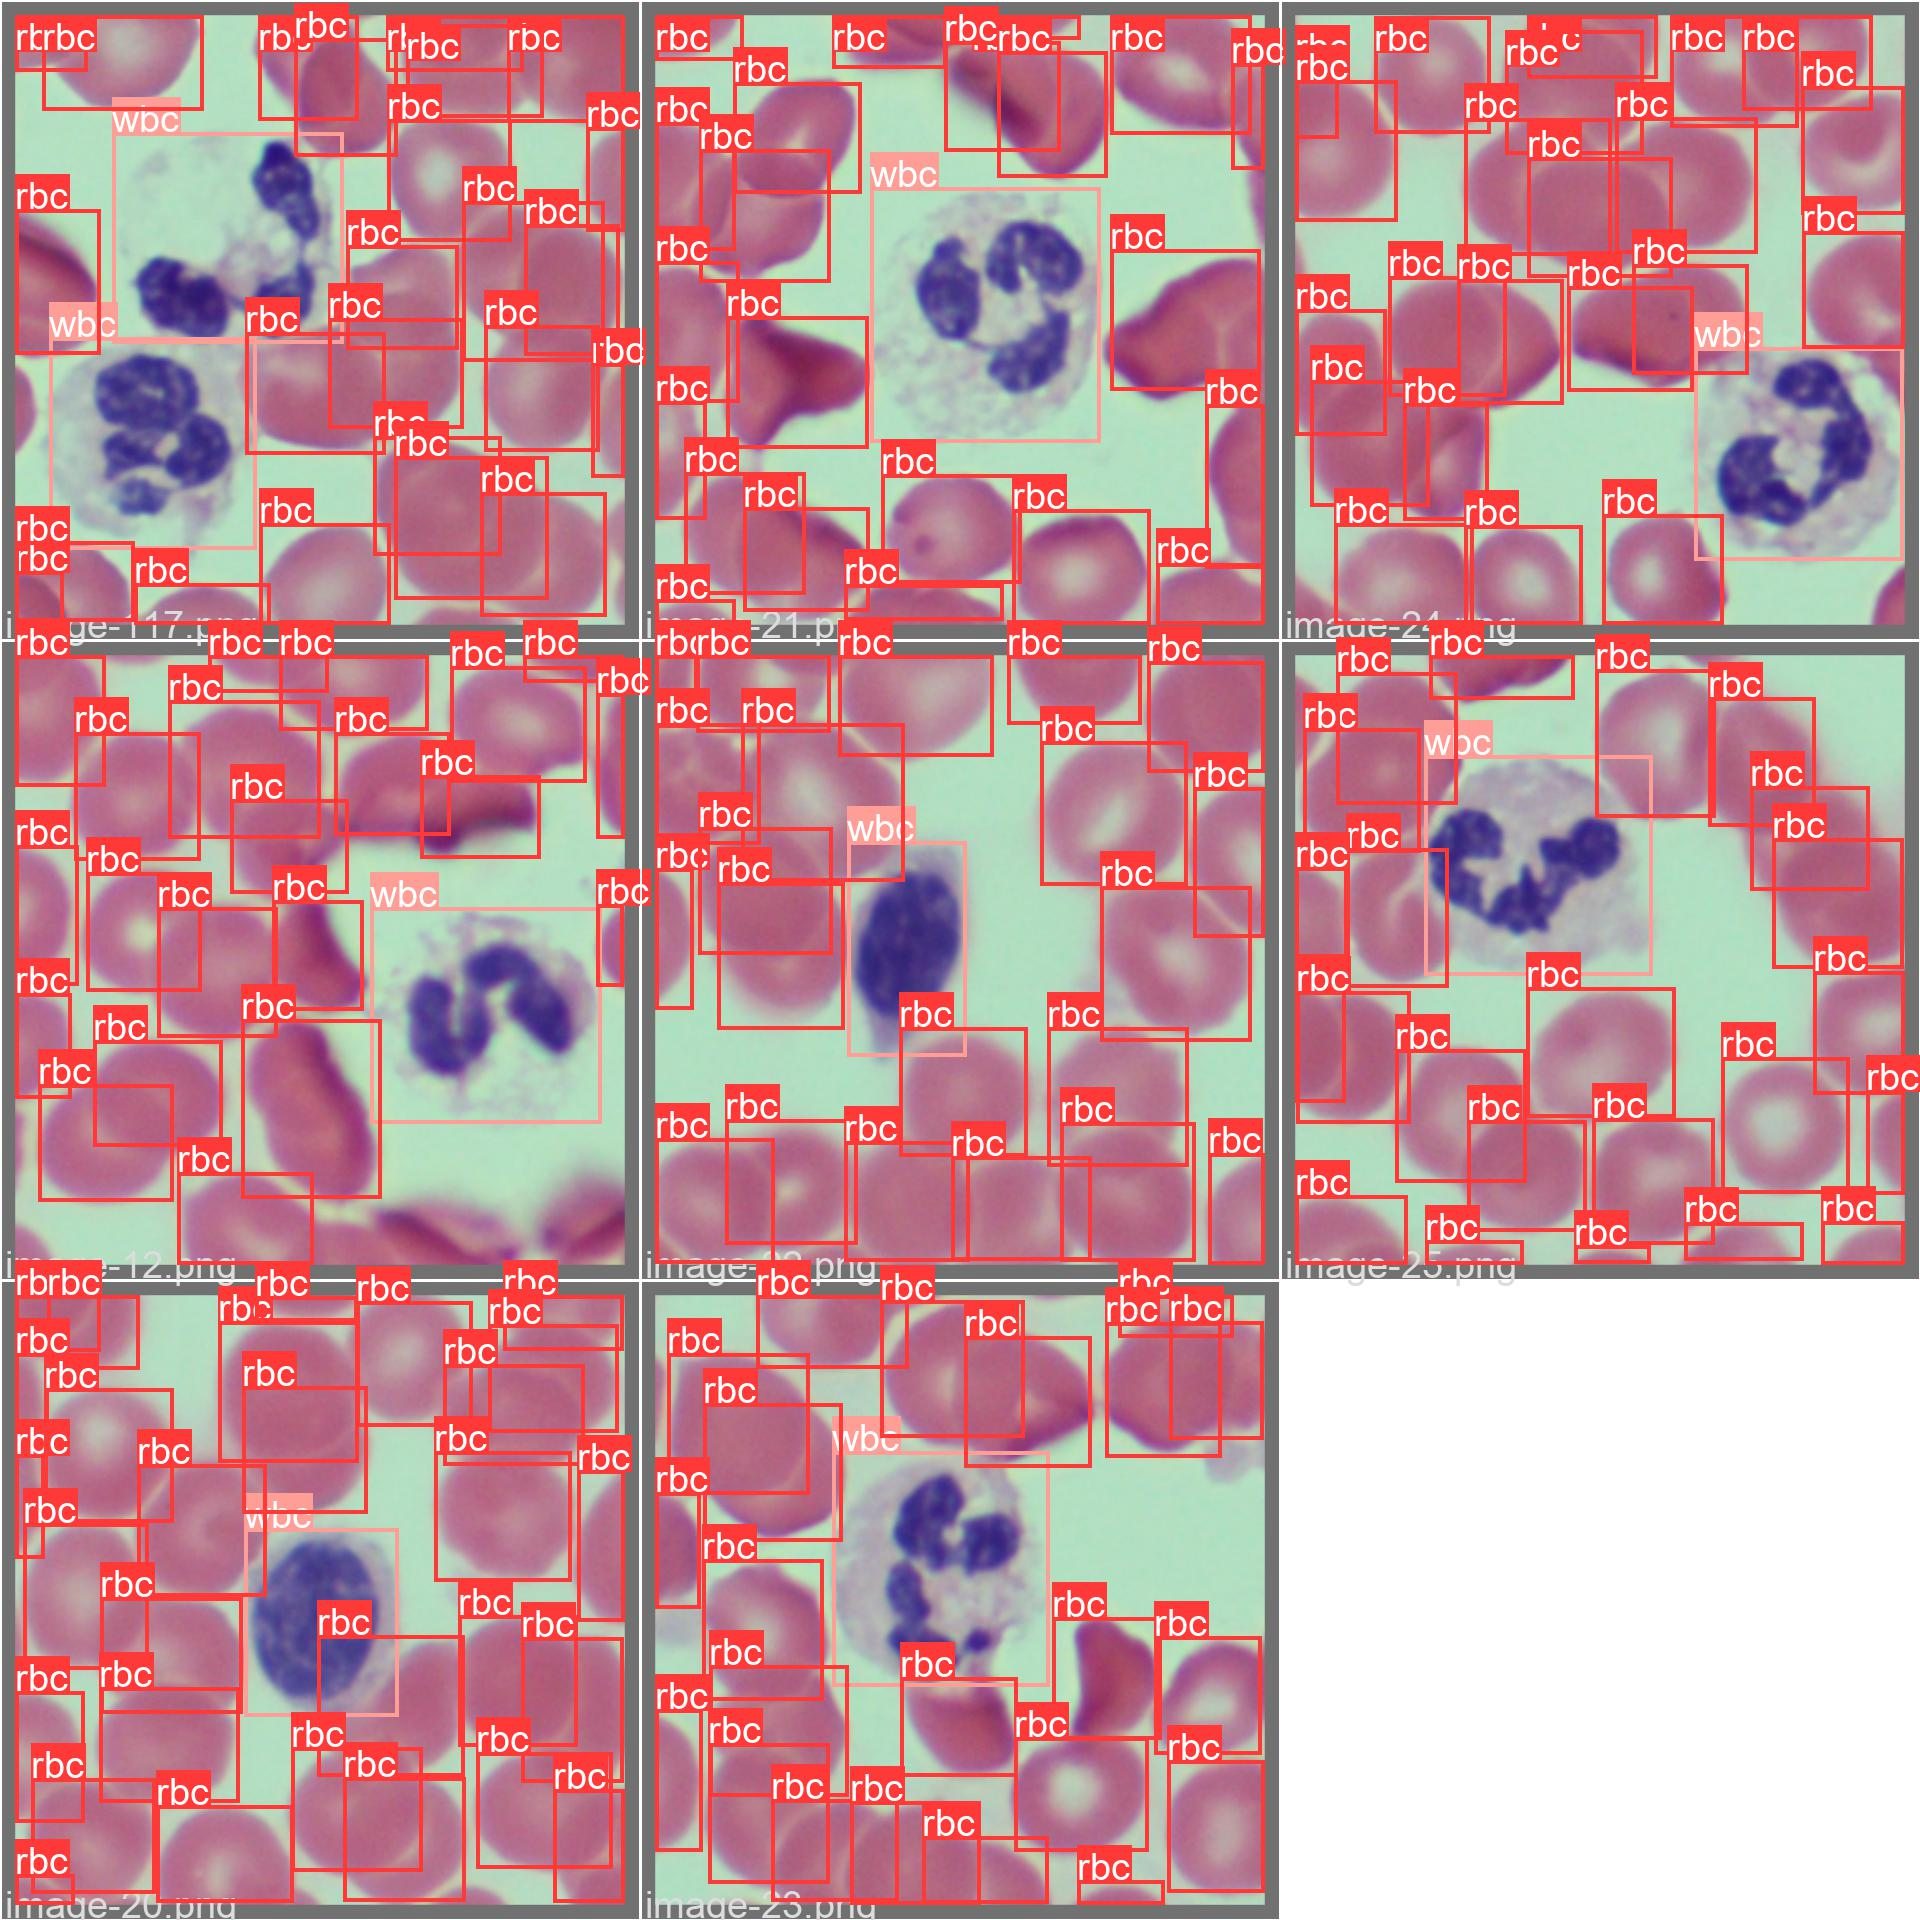

In [37]:
print(" TRAINING DATA WITH GROUND TRUTH LABELS: ")
Image(filename='/content/yolov5/runs/train/blood_cell/val_batch0_labels.jpg', width=2000)

 PREDICTIONS WITH SCORES: 


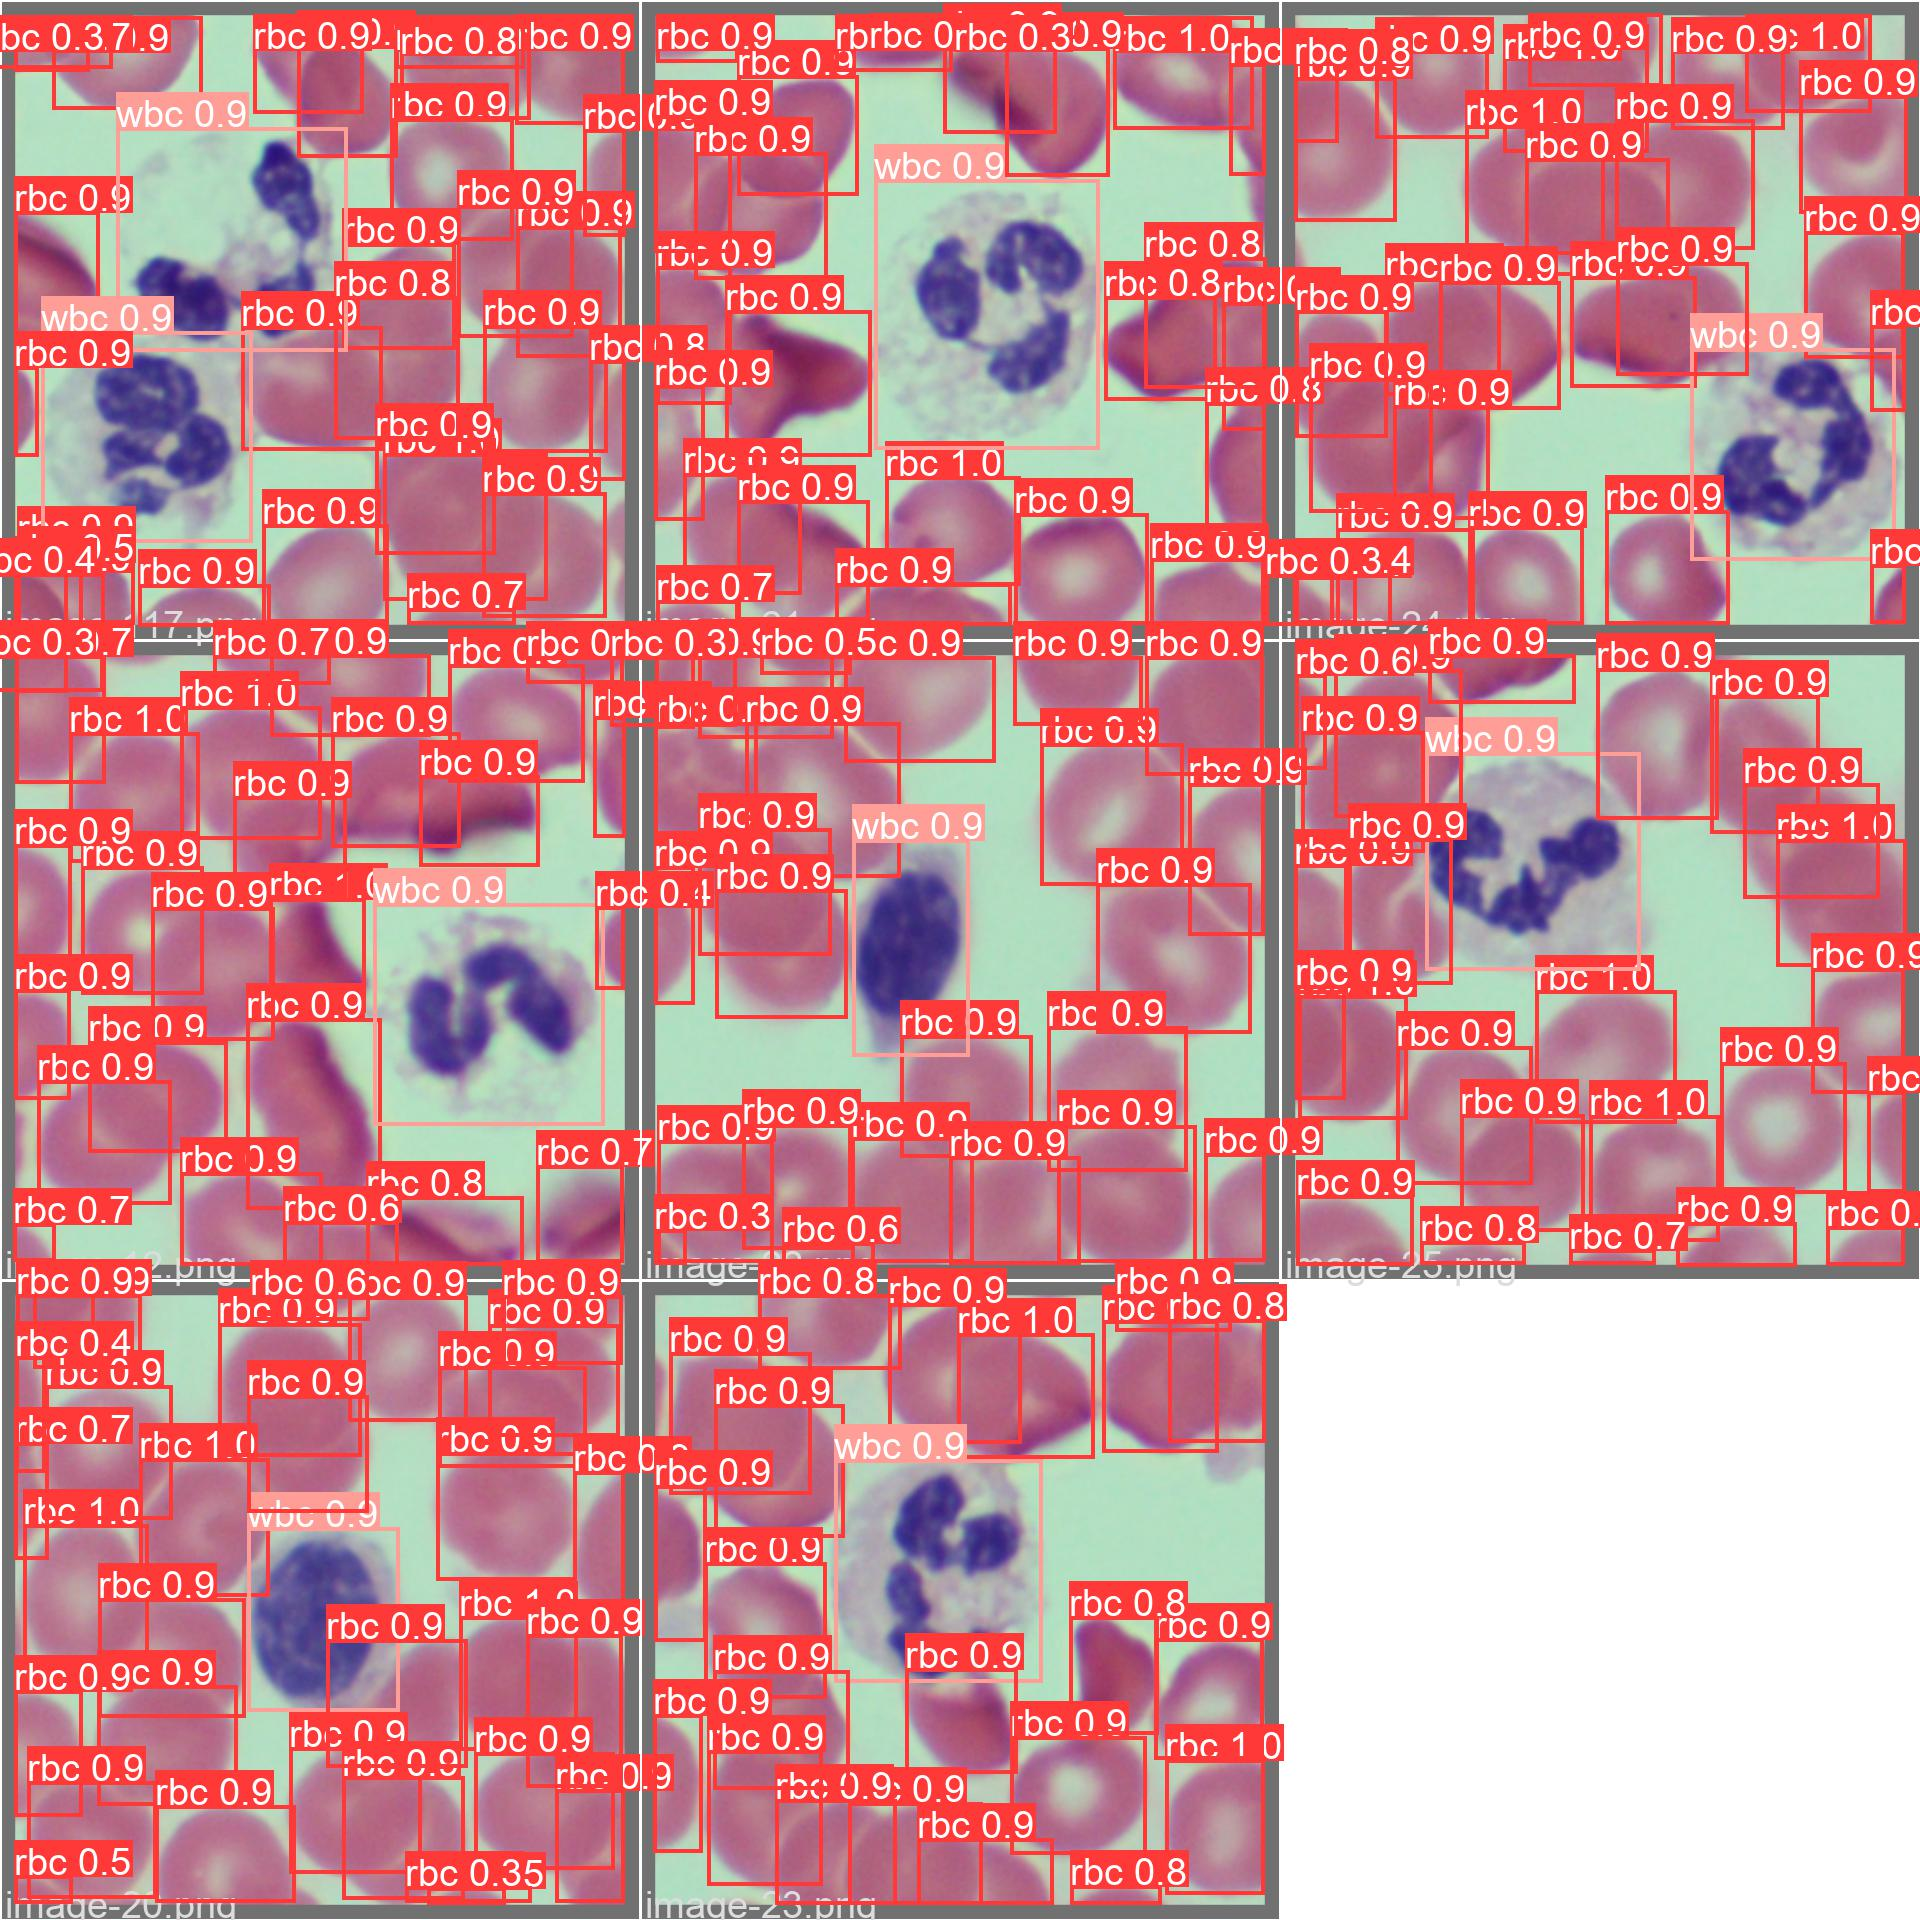

In [38]:
print(" PREDICTIONS WITH SCORES: ")
Image(filename='/content/yolov5/runs/train/blood_cell/val_batch0_pred.jpg', width=2000)


In [ ]:
#Inferencing on a random microscopic cell image downloaded from google

In [56]:
!python detect.py --weights runs/train/blood_cell/weights/best.pt --source /content/yolov5/test2.jpg --name blood_cell --project runs/detect

detect: weights=['runs/train/blood_cell/weights/best.pt'], source=/content/yolov5/test2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blood_cell, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/test2.jpg: 416x640 29 rbcs, 2 wbcs, Done. (0.009s)
Speed: 0.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/blood_cell6


In [57]:
!ls -l runs/detect/blood_cell6

total 124
-rw-r--r-- 1 root root 125893 Jul 14 09:12 test2.jpg


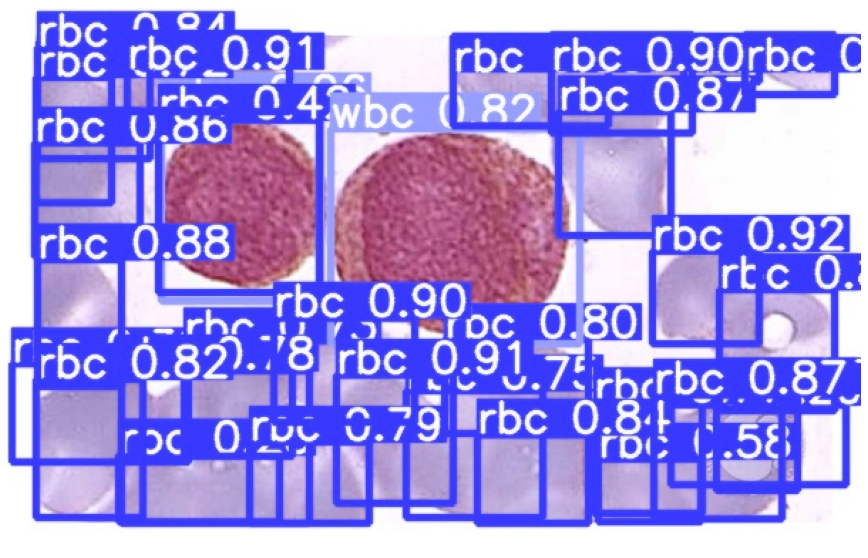

In [61]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("runs/detect/blood_cell6/test2.jpg")
plt.figure(figsize = (80,10))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#All the real rbcs are infered correctly, the bigger wbc is inferred correctly with  0.82 score 
#while the smaller wbc is inferred as wrogly as rbc with 0.4 score and correctly as wbc with 0.6 score